In [2]:
library(stats)



Warning message in plot.window(xlim, ylim, log, ...):
“ "width" はグラフィックスパラメータではありません ”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ "width" はグラフィックスパラメータではありません ”
Warning message in axis(1, ...):
“ "width" はグラフィックスパラメータではありません ”
Warning message in axis(2, ...):
“ "width" はグラフィックスパラメータではありません ”
Warning message in box(...):
“ "width" はグラフィックスパラメータではありません ”


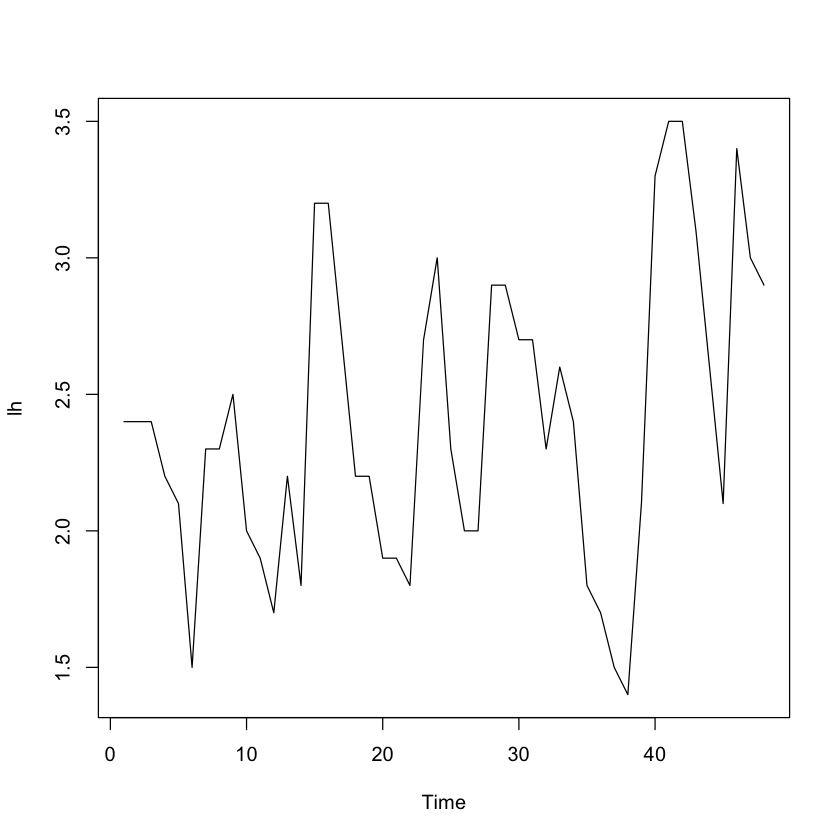

In [6]:
plot(lh)



In [16]:
lh.ar <- ar(lh)
h)


In [45]:
(lh.pr <- predict(lh.ar, n.ahead = 10))


$pred
Time Series:
Start = 49 
End = 58 
Frequency = 1 
 [1] 2.461588 2.272267 2.199151 2.262914 2.352194 2.423066 2.449223 2.441544
 [9] 2.418779 2.398456

$se
Time Series:
Start = 49 
End = 58 
Frequency = 1 
 [1] 0.4425687 0.5286675 0.5525786 0.5527502 0.5592254 0.5665903 0.5688786
 [8] 0.5689385 0.5692396 0.5697534

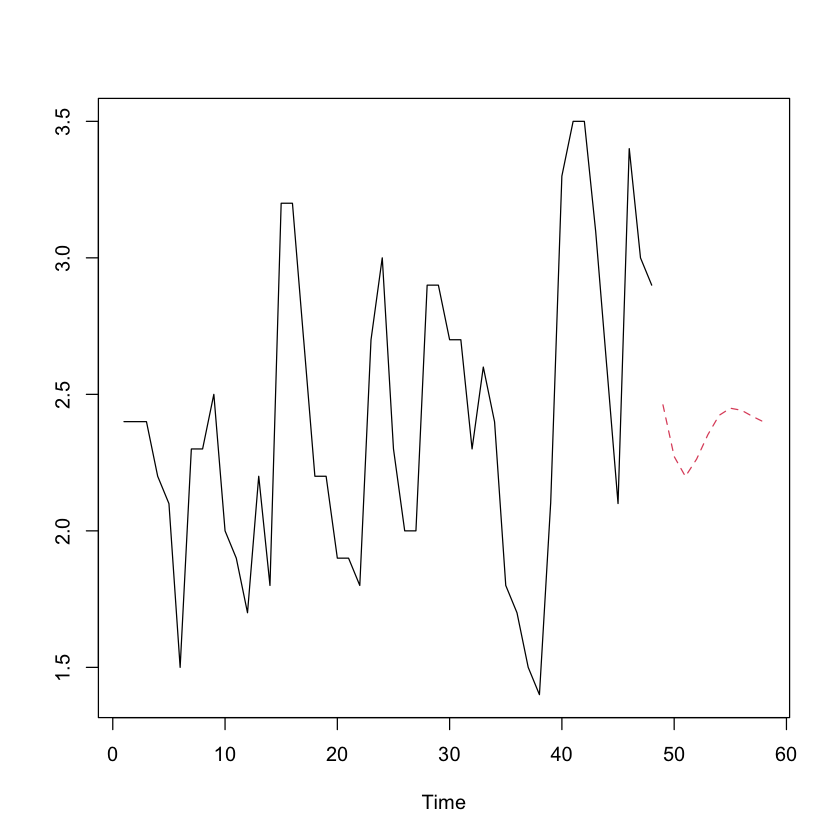

In [46]:
ts.plot(lh, lh.pr$pred, col = c(1:2), lty = c(1:2))


In [47]:
se1 <- lh.pr$pred + 2 * lh.pr$se
se2 <- lh.pr$pred - 2 * lh.pr$se
e


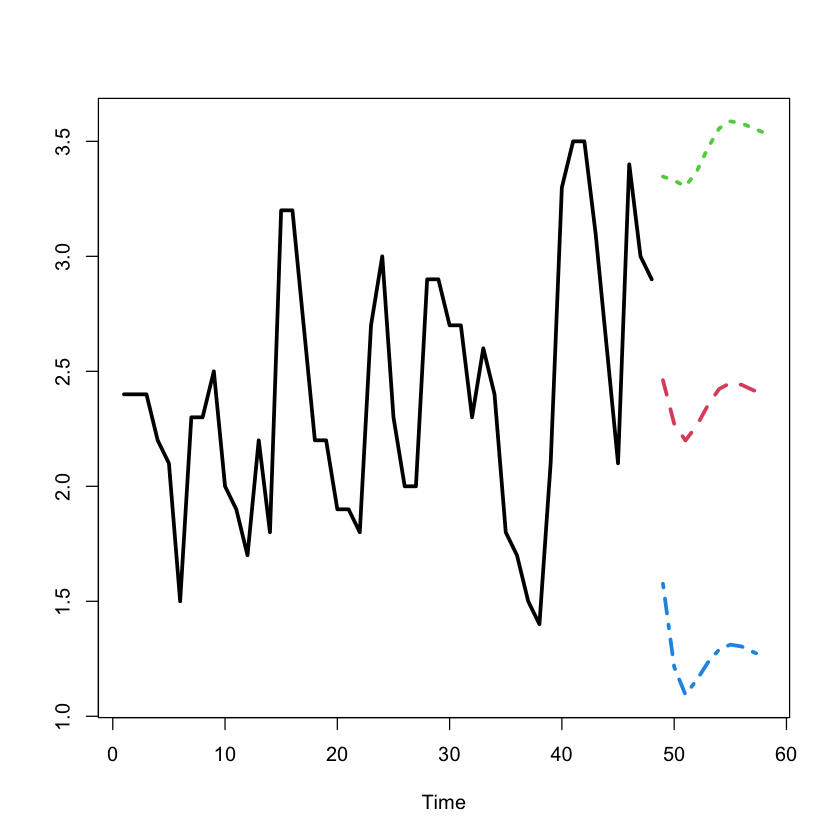

In [52]:
ts.plot(lh, lh.pr$pred, se1, se2, col = 1:4, lty = 1:4, lwd = 3)


In [113]:
(lh.arima <- arima(lh, order = c(2, 1, 2)))
(lh.arima.pr <- predict(lh.arima, n.ahead = 20))



Call:
arima(x = lh, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      1.5151  -0.6700  -1.9786  0.9999
s.e.  0.1075   0.1123   0.1324  0.1336

sigma^2 estimated as 0.1718:  log likelihood = -28.08,  aic = 66.17

$pred
Time Series:
Start = 49 
End = 68 
Frequency = 1 
 [1] 2.461019 2.203939 2.108559 2.136293 2.242219 2.384125 2.528154 2.651296
 [9] 2.741366 2.795325 2.816731 2.813010 2.793030 2.765252 2.736552 2.711681
[17] 2.693227 2.681931 2.677182 2.677555

$se
Time Series:
Start = 49 
End = 68 
Frequency = 1 
 [1] 0.4223194 0.4868219 0.4956388 0.4957613 0.5008178 0.5088952 0.5150873
 [8] 0.5174916 0.5174481 0.5175271 0.5196527 0.5243063 0.5307847 0.5379282
[15] 0.5447379 0.5506445 0.5554905 0.5593845 0.5625519 0.5652348

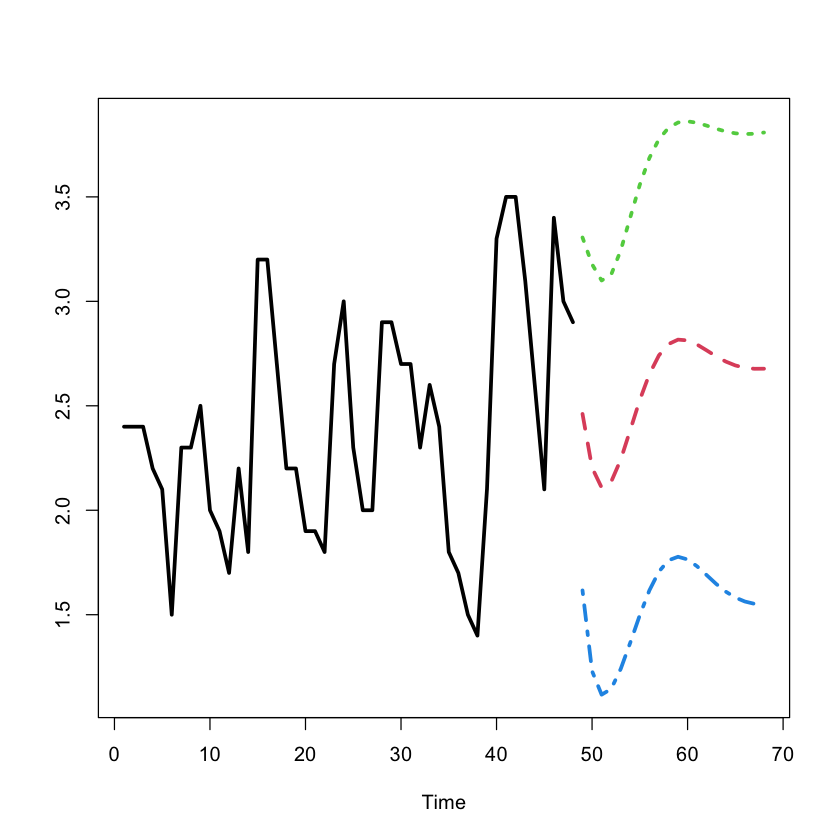

In [107]:
se1.arima <- lh.arima.pr$pred + 2 * lh.arima.pr$se
se2.arima <- lh.arima.pr$pred - 2 * lh.arima.pr$se
ts.plot(lh, lh.arima.pr$pred, se1.arima, se2.arima, col = 1:4, lty = 1:4, lwd = 3)


In [128]:
m = 10**10
p_d_q <- c(0, 0, 0)

for (p in 1:10) {
    for (d in 0:1) {
        for (q in 0:4) {
            aic <- arima(lh, c(p, d, q))$aic
            if (aic < m) {
                m <- aic
                p_d_q <- c(p, d, q)
            }
        }
    }
}
print(p_d_q)
print(m)


Warning message in log(s2):
“ 計算結果が NaN になりました ”
Warning message in log(s2):
“ 計算結果が NaN になりました ”
Warning message in log(s2):
“ 計算結果が NaN になりました ”


[1] 3 0 0
[1] 64.18482


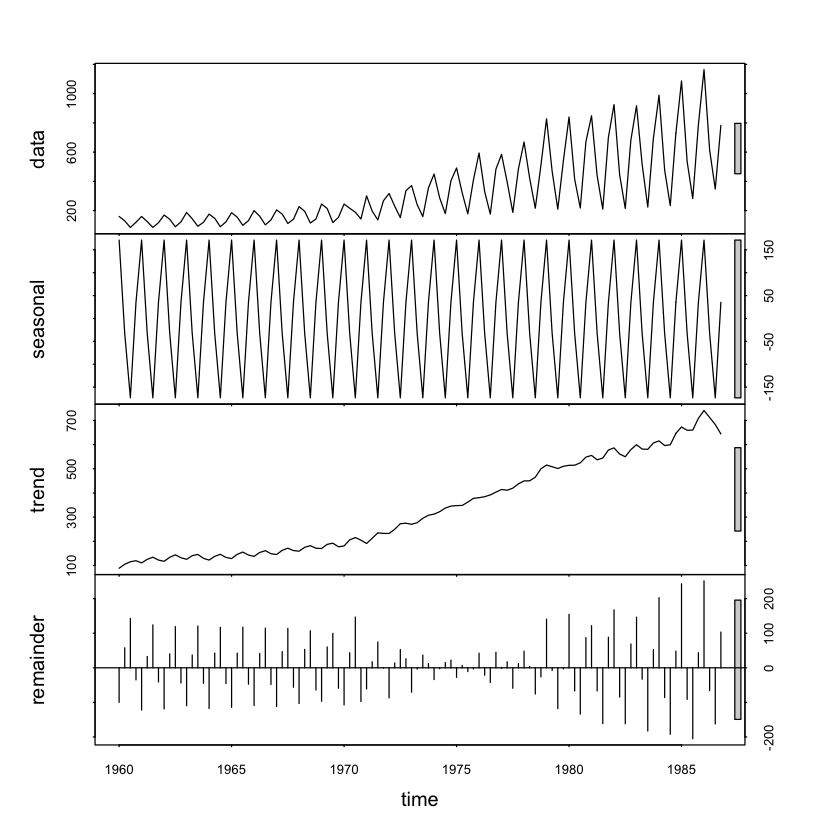

In [136]:
plot(stl(UKgas, s.window = "per"))